In [ ]:
# data = seprate(categorical , neumerical ) ===>
# categorical data ==> SimpleImputer Fill == > Encode
# numerical data ==> SimpleImputer Fill == > Standardise

# Apply == Algorithm(Logidtic Regression)


# difference b/w column tranformer and pipeline

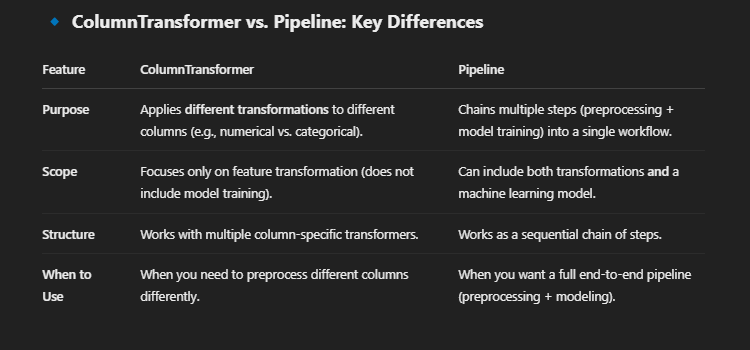

In [3]:
import numpy as np 
import pandas as pd

In [4]:
df  = pd.read_csv("covid_toy.csv")
df.head()

,age,gender,fever,cough,city,has_covid
0,60,Male,103.0,Mild,Kolkata,No
1,27,Male,100.0,Mild,Delhi,Yes
2,42,Male,101.0,Mild,Delhi,No
3,31,Female,98.0,Mild,Kolkata,No
4,65,Female,101.0,Mild,Mumbai,No


In [5]:
from sklearn.compose import ColumnTransformer
from sklearn. pipeline import Pipeline
from sklearn. impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn. linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [7]:
x = df.drop(columns = ['has_covid'])
y = df['has_covid']
x_train , x_test ,y_train, y_test  = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [9]:
# defie the columns that neeed to be preprocessed
categorical_feat = ['gender', 'city']
numerical_feat = ['age', 'fever']  


In [11]:
# create tranformers
numeric_transformer = Pipeline(steps = [ ('imputer' , SimpleImputer(strategy='mean')) , ('scaler' , StandardScaler())])

categorical_transformer = Pipeline(steps = [ ('imputer' , SimpleImputer(strategy='most_frequent')), ('onehot' , OneHotEncoder(handle_unknown='ignore'))])

# create a column transformer/combine transformers
preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numerical_feat), ('cat' , categorical_transformer, categorical_feat)])

# Crete a pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', LogisticRegression())])

# Trainthe model
clf.fit(x_train, y_train)

# evaluate the model
y_pred = clf.predict(x_test)


In [13]:
# y_pred

In [14]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test,y_pred)

In [ ]:
acc #model accuracy is 65%

0.65

In [ ]:
# apply this to new_project.ipynb
# why do we make virrtual environment 
# how do we make virtual environment